# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

https://sites.google.com/site/timeserieschain/

In [1]:
# SETUP
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results

## Web Query Data ##
A decade-long GoogleTrend query volume for the keyword Kohl’s, an American retail chain.

Ground Truth: Chains are the growing Importants of Cyber Monday. One bump according to stumpy tutorial ->  m = 20.

In [2]:
# SETUP
use_case = "chains"
data_name = "webquery"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")

### Experiment ###

In [3]:
# SETUP Hyperparams
target_w = 20

# calculate corresponding dilation sizes
d = 1
ds = []
m = round((target_w-1)/d) + 1
while d < m:
    ds.append(d)
    d += 1
    m = round((target_w-1)/d) + 1

print(ds)

[1, 2, 3, 4]


In [4]:
# calculate
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/"+ use_case + "/" + data_name + "/" + file_name

    if d == 1:
        mp = stumpy.stump(T, m=m)
    else:
        mp = stumpy.stump_dil(T, m=m, d=d)
    all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
    
    results.save([T, m, d, mp, all_chain_set, unanchored_chain], file_path + ".npy")

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different l

[ 35  87 139 244 296 400 452]
[134 239 291 343 395 447 500]
[  3  69 211 328 381]
[ 10  19 179 278 490]


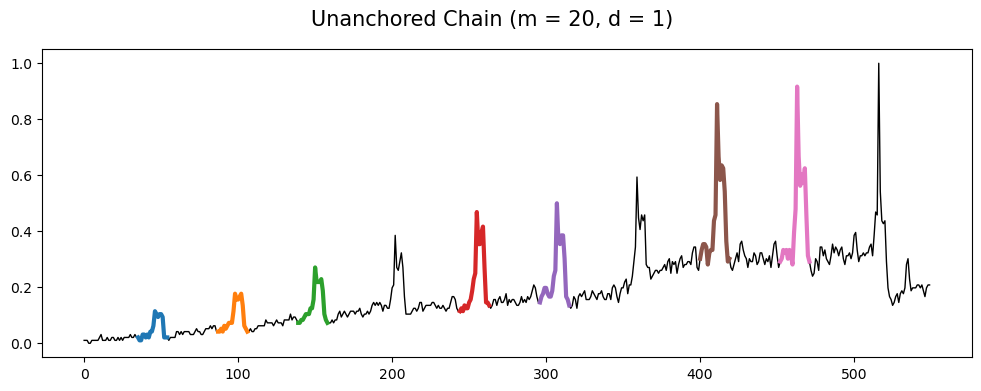

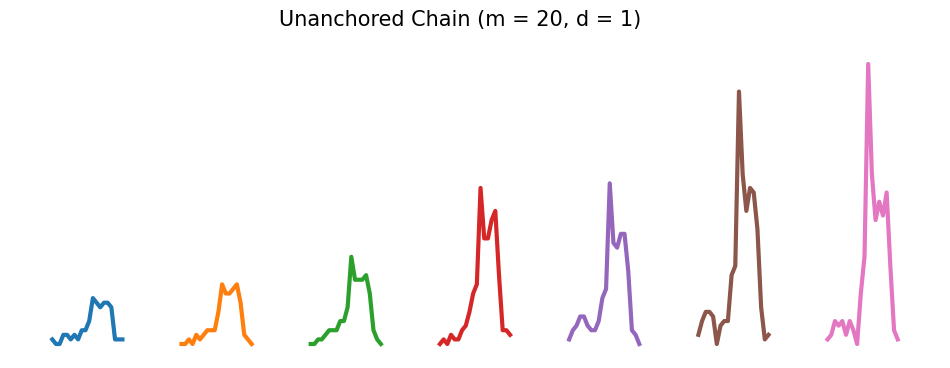

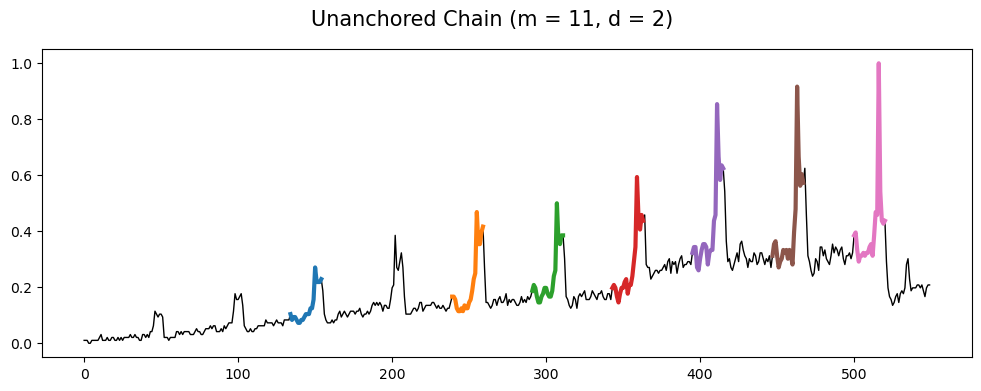

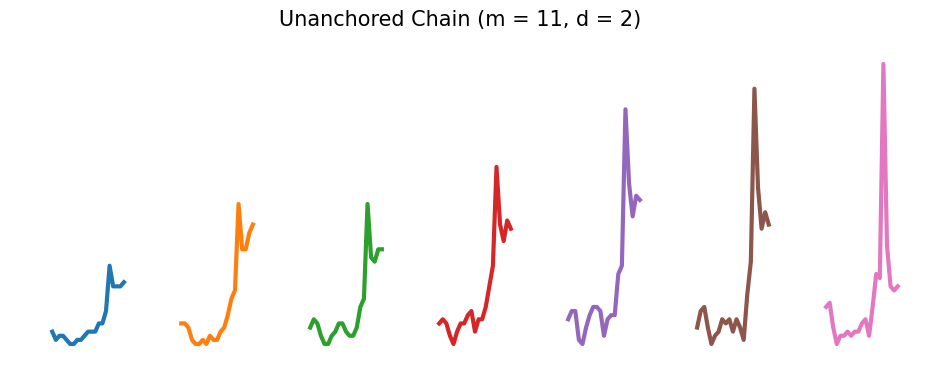

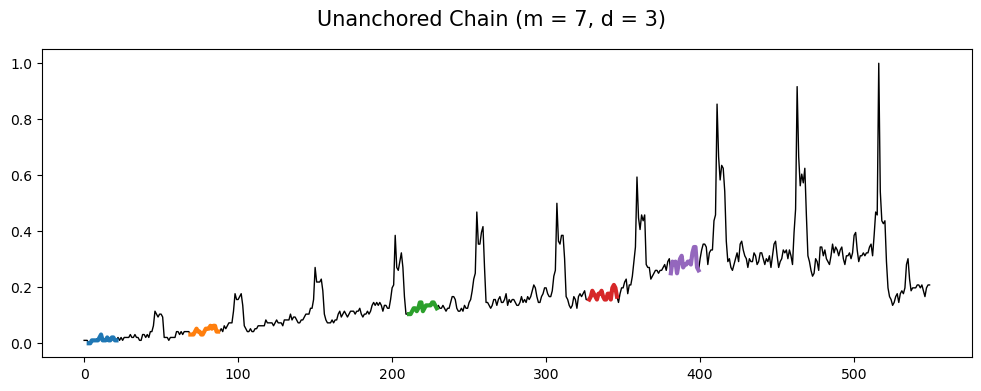

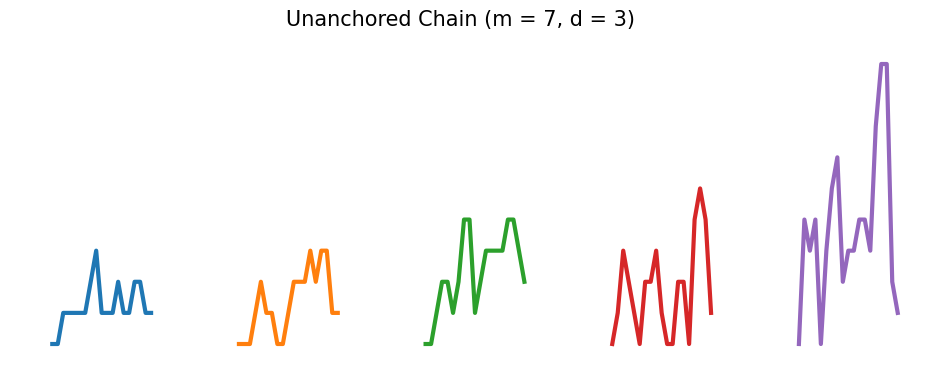

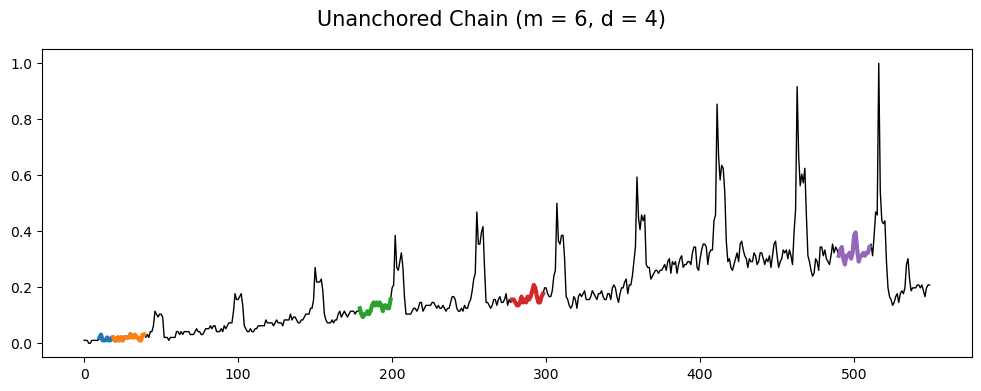

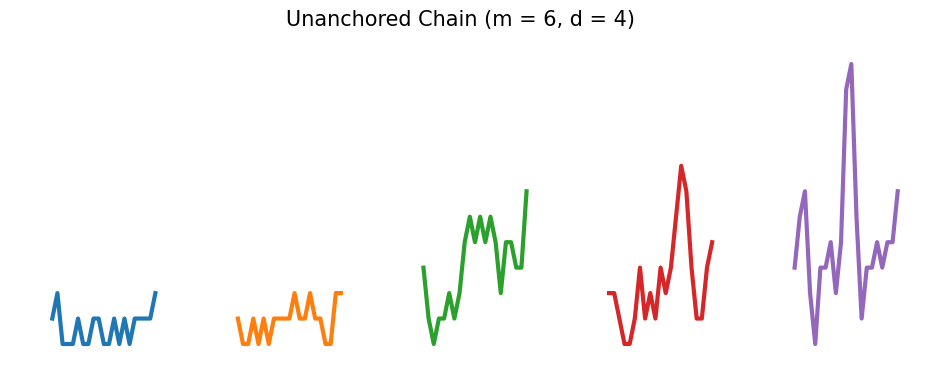

In [5]:
# visualize:
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    T, m, d, mp, all_chain_set, unanchored_chain = results.load(file_path + ".npy")
    
    print(unanchored_chain)
    plot = visualize.chain_unanchored(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored")
    plot = visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored_snippets")